<a href="https://colab.research.google.com/github/cassiomatheus/Full_Stack_PHP/blob/main/Atividade_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercicio A - Surpresa

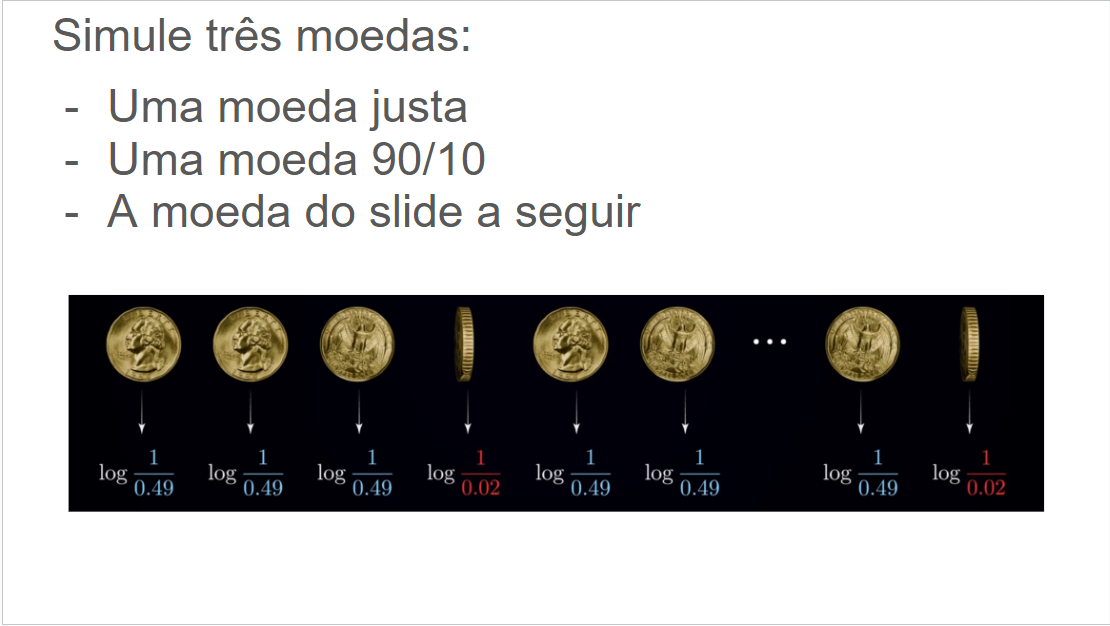

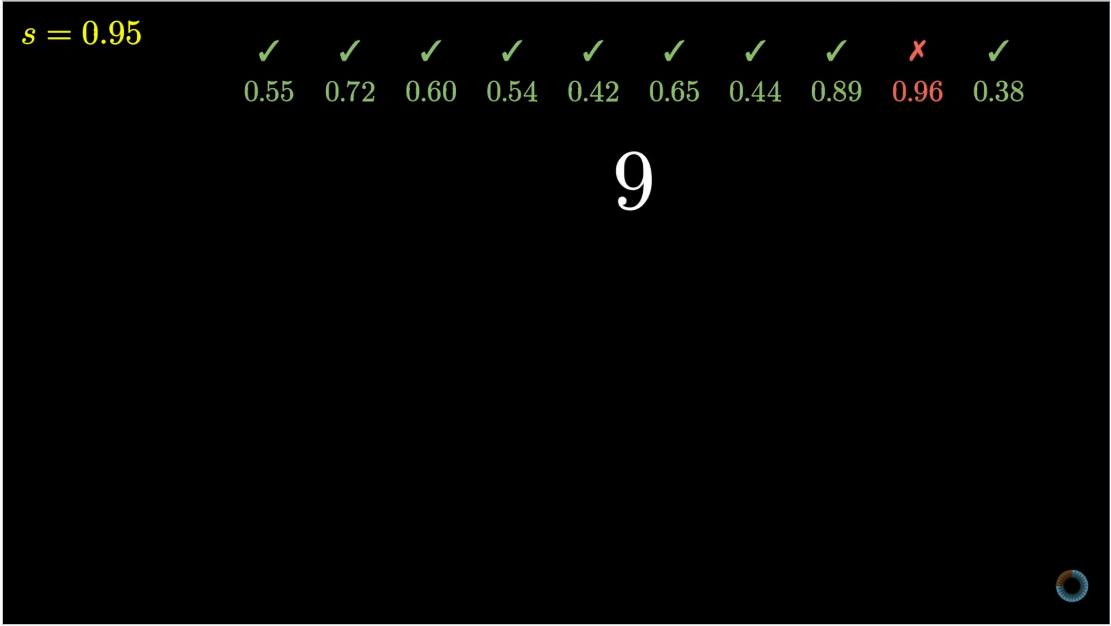

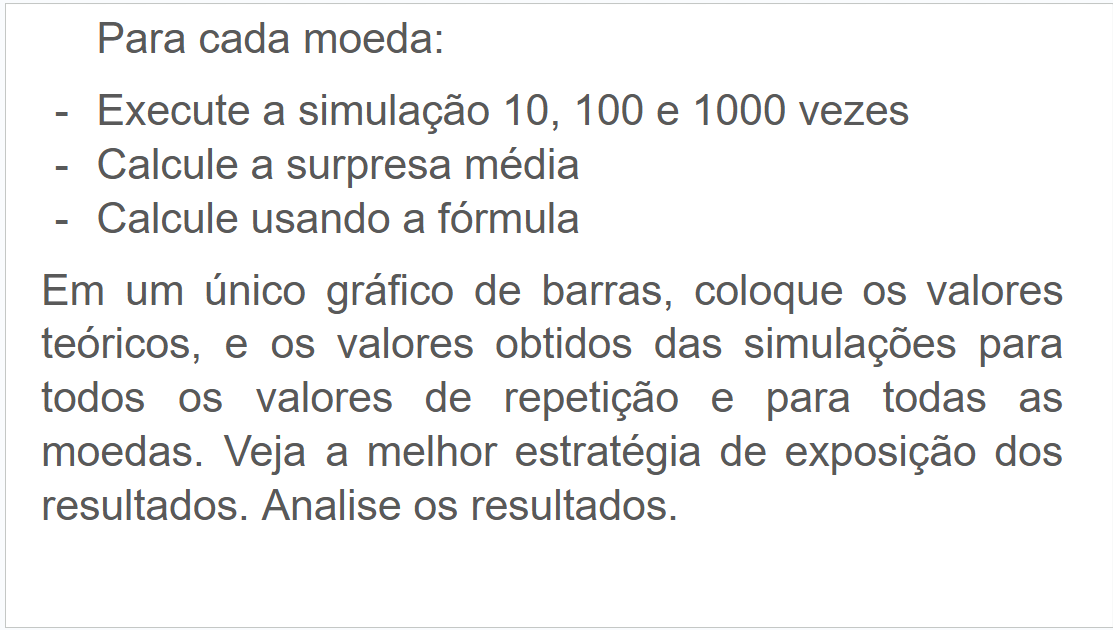

In [ ]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A1. A.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A1. B.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A1. C.png", width=950))

In [ ]:
def entropia(probabilidades):
    probabilidades = np.array(probabilidades)
    # Filtra apenas os valores maiores que zero para evitar log(0)
    probabilidades = probabilidades[probabilidades > 0]
    return -np.sum(probabilidades * np.log2(probabilidades))


def moeda_empate(Quant):
    import random
    resultados = {'cara': 0, 'coroa': 0, 'empate': 0}

    for _ in range(Quant):
        valor = random.random()
        if valor < 0.49:
            resultados['cara'] += 1
        elif valor < 0.98:
            resultados['coroa'] += 1
        else:
            resultados['empate'] += 1

    #print("\nResumo da simulação para moeda com empate:")
    #for resultado, contagem in resultados.items():
        #print(f"{resultado.capitalize()}: {contagem} ({contagem/Quant:.2%})")

    p = [resultados['cara']/Quant, resultados['coroa']/Quant, resultados['empate']/Quant]
    h = entropia(p)
    #print(f"Entropia (surpresa média): {h:.6f} bits")
    return h

def moeda_justa(Quant):
    import random
    resultados = {'cara': 0, 'coroa': 0}
    for _ in range(Quant):
        valor = random.random()
        if valor < 0.5:
            resultados['cara'] += 1
        else:
            resultados['coroa'] += 1

    #print("\nResumo da simulação para moeda justa:")
    #for resultado, contagem in resultados.items():
        #print(f"{resultado.capitalize()}: {contagem} ({contagem/Quant:.2%})")

    p = [resultados['cara']/Quant, resultados['coroa']/Quant]
    h = entropia(p)
    #print(f"Entropia (surpresa média): {h:.6f} bits")
    return h

def moeda_viciada(Quant):
    import random
    resultados = {'cara': 0, 'coroa': 0}
    for _ in range(Quant):
        valor = random.random()
        if valor < 0.9:
            resultados['cara'] += 1
        else:
            resultados['coroa'] += 1

    #print("\nResumo da simulação para moeda viciada:")
    #for resultado, contagem in resultados.items():
        #print(f"{resultado.capitalize()}: {contagem} ({contagem/Quant:.2%})")

    p = [resultados['cara']/Quant, resultados['coroa']/Quant]
    h = entropia(p)
    #print(f"Entropia (surpresa média): {h:.6f} bits")
    return h

In [ ]:
empate = {}
justa = {}
viciada = {}

empate[0] = round(entropia([0.49, 0.49, 0.02]), 3)
justa[0] = round(entropia([0.5, 0.5]), 3)
viciada[0] = round(entropia([0.9, 0.1]), 3)

empate[1] = round(moeda_empate(10), 3)
justa[1] = round(moeda_justa(10), 3)
viciada[1] = round(moeda_viciada(10), 3)

empate[2] = round(moeda_empate(100), 3)
justa[2] = round(moeda_justa(100), 3)
viciada[2] = round(moeda_viciada(100), 3)

empate[3] = round(moeda_empate(1000), 3)
justa[3] = round(moeda_justa(1000), 3)
viciada[3] = round(moeda_viciada(1000), 3)

print(empate)
print(justa)
print(viciada)

{0: np.float64(1.121), 1: np.float64(0.722), 2: np.float64(1.121), 3: np.float64(1.13)}
{0: np.float64(1.0), 1: np.float64(0.971), 2: np.float64(0.981), 3: np.float64(1.0)}
{0: np.float64(0.469), 1: np.float64(0.469), 2: np.float64(0.286), 3: np.float64(0.456)}


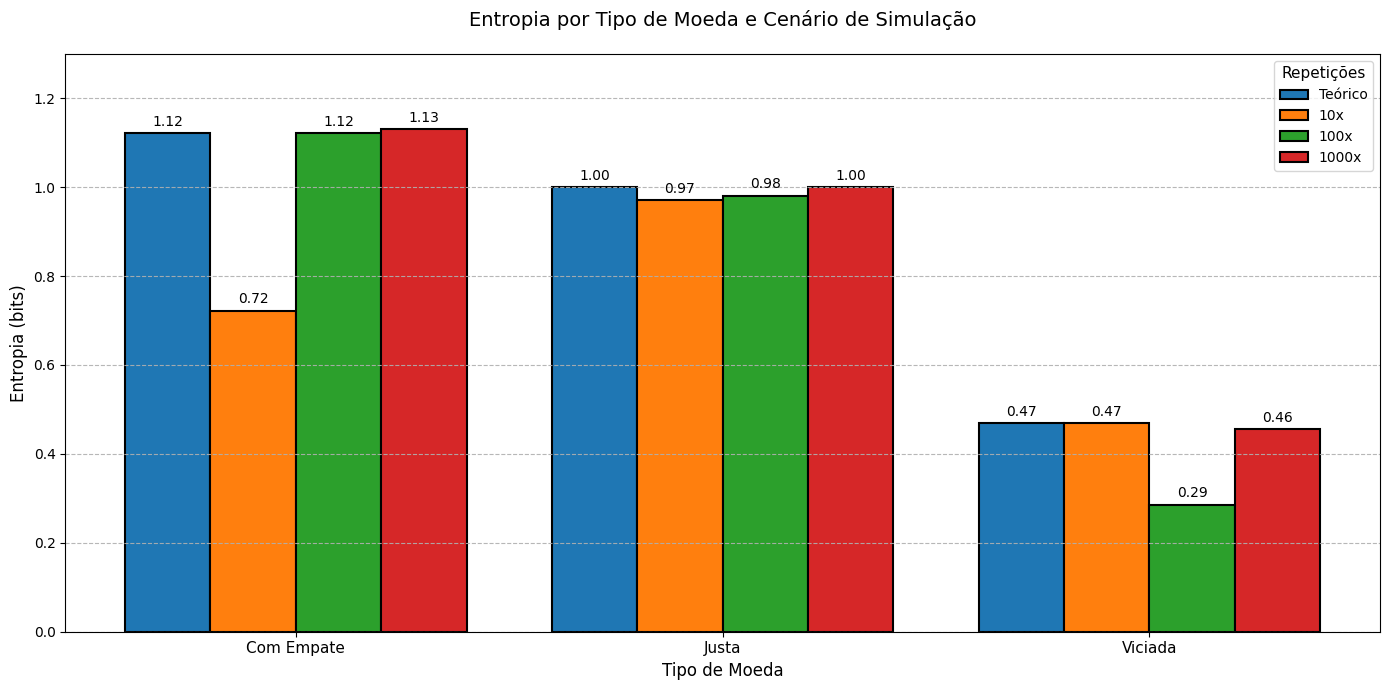

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dados = {
    'Com Empate': empate,
    'Justa': justa,
    'Viciada': viciada
}

# Cenários (sub-colunas)
cenarios = ['Teórico', '10x', '100x', '1000x']
tipos_moedas = list(dados.keys())

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# Largura das barras e posições
largura = 0.2
x = np.arange(len(tipos_moedas))

# Cores para cada cenário
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotando as barras com bordas pretas
for i, cenario in enumerate(cenarios):
    valores = [dados[moeda][i] for moeda in tipos_moedas]
    barras = ax.bar(
        x + i * largura,
        valores,
        largura,
        label=cenario,
        color=cores[i],
        edgecolor='black',  # Bordas pretas
        linewidth=1.5       # Espessura da borda
    )

    # Adiciona os valores no topo de cada barra
    for barra in barras:
        altura = barra.get_height()
        ax.text(
            barra.get_x() + barra.get_width() / 2,
            altura + 0.01,
            f'{altura:.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Ajustes estéticos
ax.set_xlabel('Tipo de Moeda', fontsize=12)
ax.set_ylabel('Entropia (bits)', fontsize=12)
ax.set_title('Entropia por Tipo de Moeda e Cenário de Simulação', fontsize=14, pad=20)
ax.set_xticks(x + largura * 1.5)
ax.set_xticklabels(tipos_moedas, fontsize=11)
ax.set_ylim(0, 1.3)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.legend(title='Repetições', title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
simular_varias_amostras(10)


🔹 Simulando 10 amostras com 10 lançamentos cada:
Amostra 1: Cara=0.70, Coroa=0.20, Empate=0.10, Surpresa média=1.157 bits
Amostra 2: Cara=0.40, Coroa=0.60, Empate=0.00, Surpresa média=0.971 bits
Amostra 3: Cara=0.50, Coroa=0.50, Empate=0.00, Surpresa média=1.000 bits
Amostra 4: Cara=0.30, Coroa=0.70, Empate=0.00, Surpresa média=0.881 bits
Amostra 5: Cara=0.60, Coroa=0.40, Empate=0.00, Surpresa média=0.971 bits
Amostra 6: Cara=0.50, Coroa=0.50, Empate=0.00, Surpresa média=1.000 bits
Amostra 7: Cara=0.50, Coroa=0.50, Empate=0.00, Surpresa média=1.000 bits
Amostra 8: Cara=0.40, Coroa=0.60, Empate=0.00, Surpresa média=0.971 bits
Amostra 9: Cara=0.50, Coroa=0.50, Empate=0.00, Surpresa média=1.000 bits
Amostra 10: Cara=0.60, Coroa=0.40, Empate=0.00, Surpresa média=0.971 bits


In [ ]:
# Moeda justa
p_justa = [0.5, 0.5]
print("Entropia moeda justa:", entropia(p_justa))  # Saída: 1.0

# Moeda viciada
p_viciada = [0.9, 0.1]
print("Entropia moeda viciada:", entropia(p_viciada))  # Saída: ~0.47

# Três classes
p_3_classes = [0.49, 0.49, 0.02]
print("Entropia 3 classes:", entropia(p_3_classes))  # Saída: ~1.156


Entropia moeda justa: 1.0
Entropia moeda viciada: 0.4689955935892812
Entropia 3 classes: 1.1214405425418206


# Exercicio B - Entropia

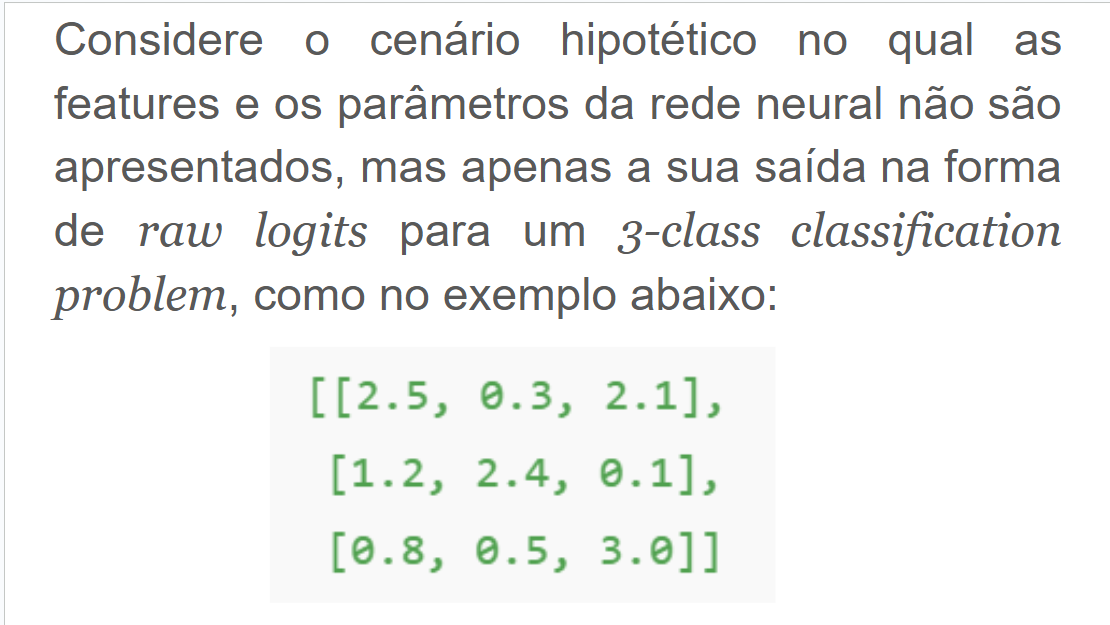

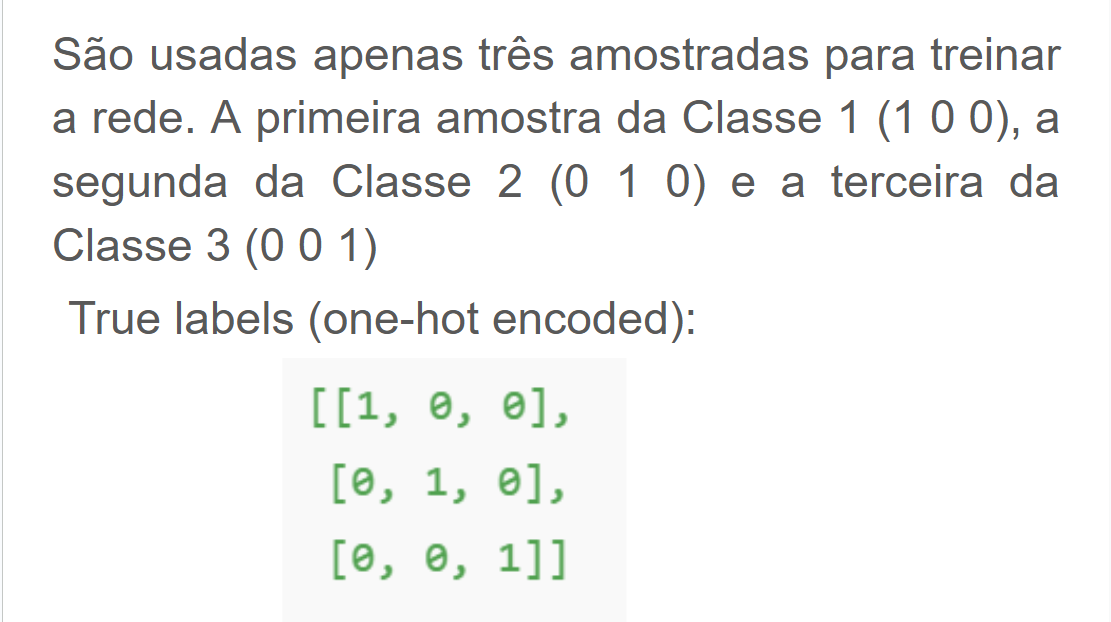

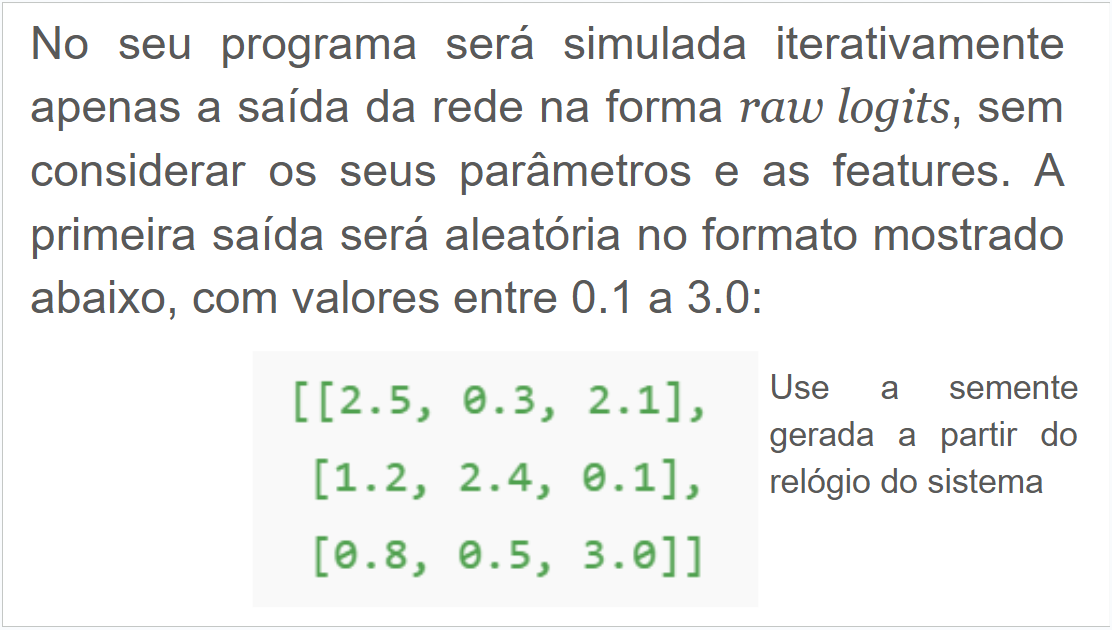

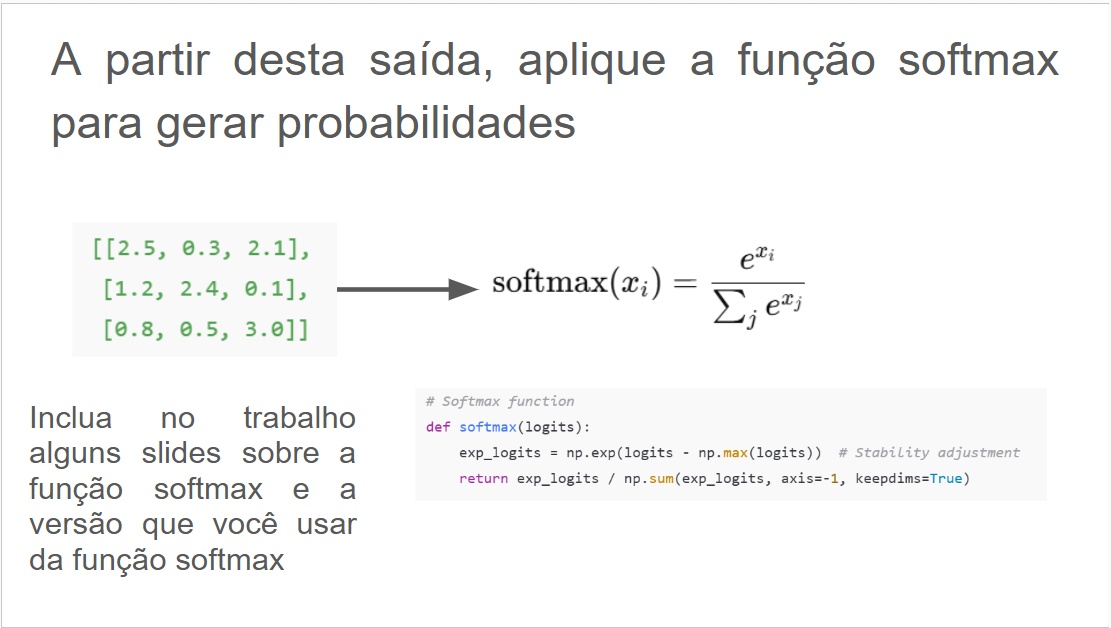

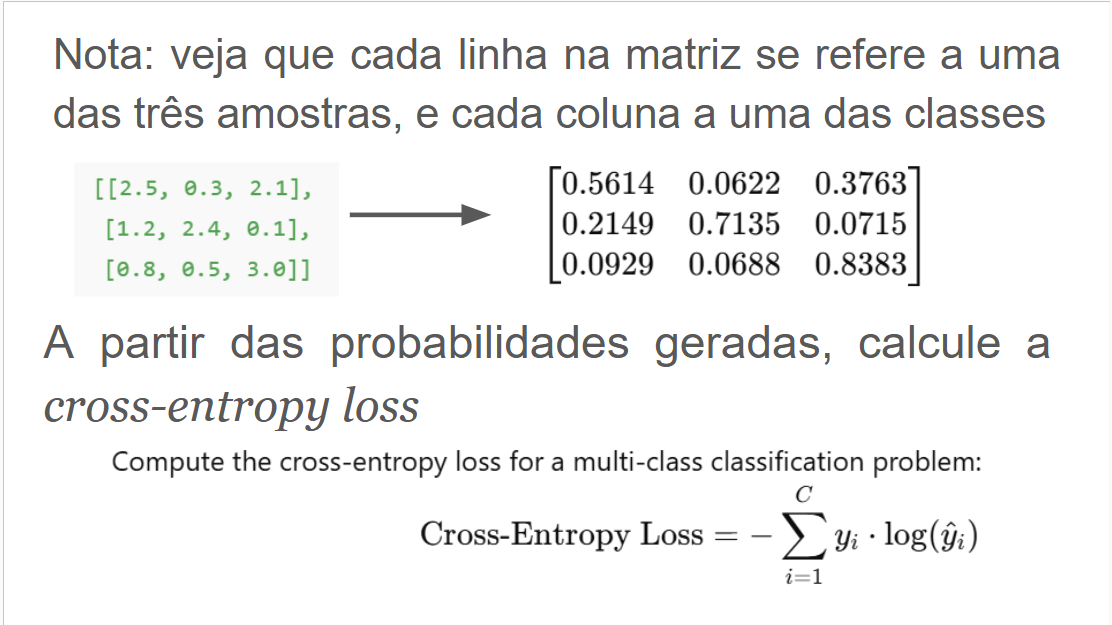

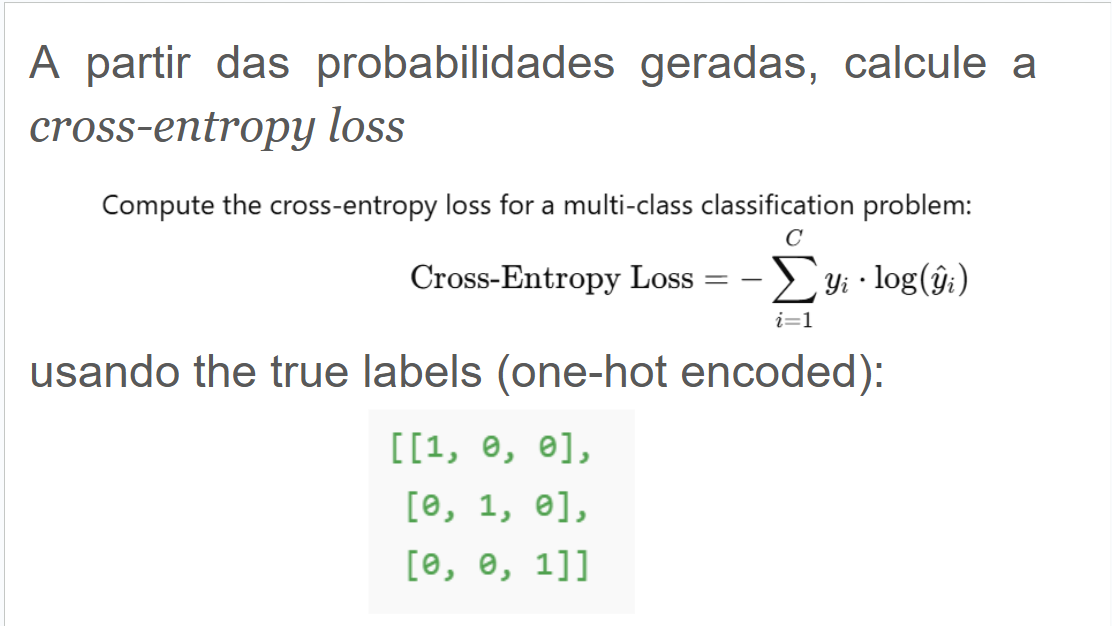

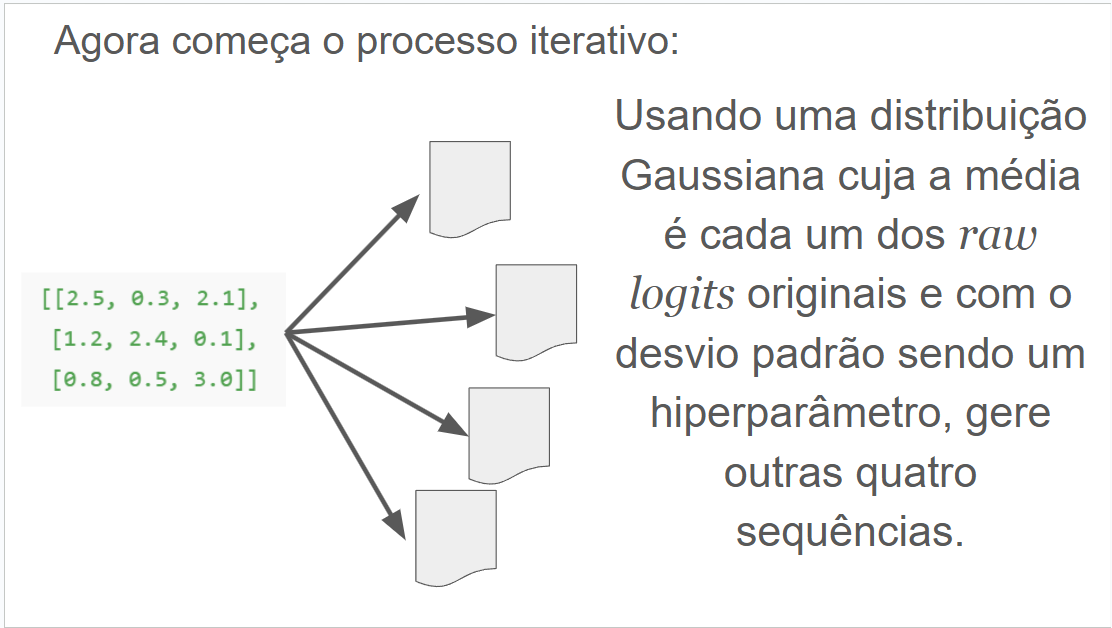

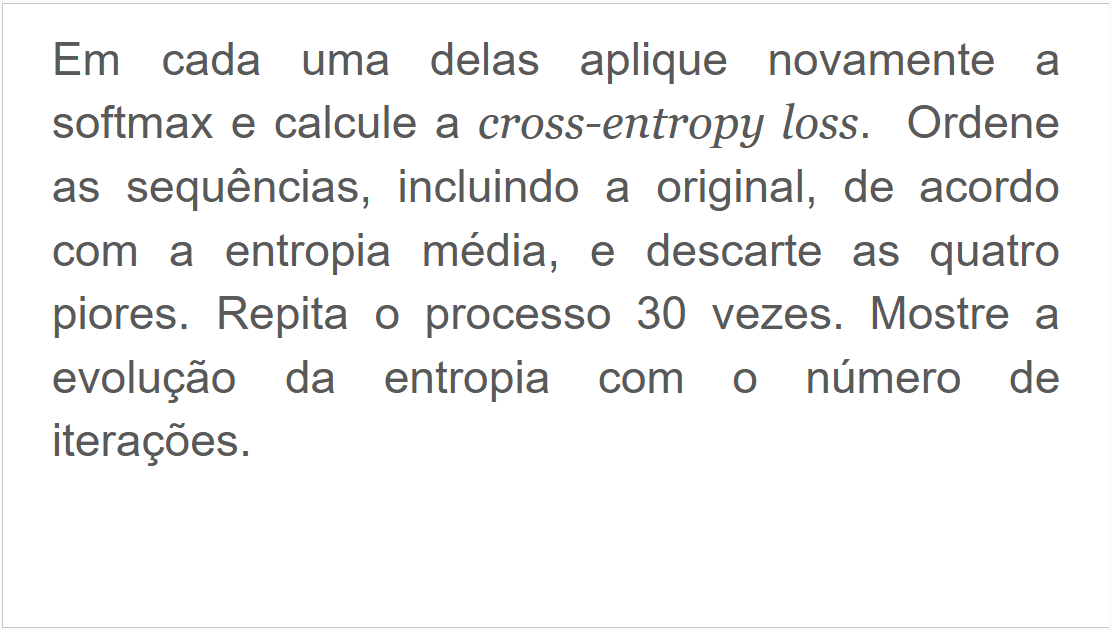

In [ ]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A2. A.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. B.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. C.png", width=950))
print("")

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A2. D.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. E.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. F.png", width=950))
print("")

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. G.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A2. H.png", width=950))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

## Softmax

Ela transforma um vetor de números (chamados de *logits* ou *scores*) em um vetor de probabilidades, onde cada valor está entre 0 e 1, e a soma de todos os valores é igual a 1. Isso permite interpretar os resultados como probabilidades de cada classe.

### Fórmula da Softmax

Dado um vetor de entrada  
**z** = $[z\_1, z\_2, ..., z\_K]  $
(onde **K** é o número de classes), a Softmax calcula a probabilidade $ p_i $ para a classe $ i $ da seguinte forma:

$$
p_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

**Explicações:**

- $ e^{z_i} $: Exponencial do valor $ z_i $ (garante que os valores sejam positivos).
- $ \sum_{j=1}^{K} e^{z_j} $: Soma das exponenciais de todos os valores do vetor (normalização).


In [ ]:
# Função
def softmax(logits):
    exp_vals = np.exp(logits - np.max(logits))  # estabilidade numérica
    return exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)

def cross_entropy_loss(probs, targets):
    return -np.sum(targets * np.log(probs + 1e-15)) / targets.shape[0]

#probs = softmax([2.5, 0.3, 2.1])
#print(probs)

In [ ]:
# Gerar a primeira saida
num_amostras = 3  # Quantidade de amostras
tamanho_amostra = 3  # Quantidade de valores por amostra
valor_min, valor_max = 0.1, 3.0  # Intervalo dos valores

# Gera as amostras aleatórias
logit_examples = {
    f"Amostra {i+1}": np.round(np.random.uniform(valor_min, valor_max, tamanho_amostra), 3)
    for i in range(num_amostras)
}

# Converter para um array NumPy multidimensional
array_resultante = np.array(list(logit_examples.values()))
original_logits = array_resultante

print("Array resultante:")
print(array_resultante)

Array resultante:
[[2.214 0.681 2.904]
 [0.246 1.092 2.835]
 [1.484 2.284 0.204]]


In [ ]:
# Targets one-hot
targets = np.array([
    [1, 0, 0],  # Classe 1
    [0, 1, 0],  # Classe 2
    [0, 0, 1]   # Classe 3
])

# Média e desvio padrão para gerar ruído
mean = np.mean(original_logits, axis=0)
std = np.std(original_logits, axis=0)

#print("Média:", mean)
#print("Desvio padrão:", std)

def fun_geradora(saida):
    # Gera 5 variantes de logits (1 original + 4 com ruído)
    logits_variantes = [saida]  # Começa com a original
    for _ in range(4):
        variante = saida + np.random.normal(0, std, size=saida.shape)
        logits_variantes.append(variante)

    print("Logits (5x3):\n", np.round(logits_variantes, 2))

    resultados = []

    # Calcula softmax, loss e guarda os resultados
    for idx, logits in enumerate(logits_variantes):
        probs = softmax(logits)
        loss = cross_entropy_loss(probs, targets)
        resultados.append((logits, loss))

    # Ordena pela entropia (loss crescente)
    resultados_ordenados = sorted(resultados, key=lambda x: x[1])

    # Mantém só o melhor (menor loss)
    melhor_logit, melhor_loss = resultados_ordenados[0]

    print("\n--- MELHOR SAÍDA (menor entropia) ---")
    print("Logits:\n", np.round(melhor_logit, 2))
    print("Probabilidades (softmax):\n", np.round(softmax(melhor_logit), 3))
    print("Cross-entropy loss:", round(melhor_loss, 6))
    print("")

    return np.round(melhor_logit, 2) ,  np.round(softmax(melhor_logit), 3), round(melhor_loss, 4)

Média: [1.31466667 1.35233333 1.981     ]
Desvio padrão: [0.81230591 0.67981975 1.25684446]


In [ ]:
MELHOR = {}
ENTROPY = {}

for i in range(30):
    print(f"\nIteração {i + 1}")

    if i == 0:
        logits_variados = fun_geradora(original_logits)
        ENTROPY[i] = logits_variados[2]
    else:
        REC = MELHOR[i - 1]
        #print("Melhor da iteração anterior:\n", REC)
        logits_variados = fun_geradora(REC)

    MELHOR[i] = logits_variados[0]  # Salva o melhor logit da iteração atual
    ENTROPY[i] = logits_variados[2]  # Salva a entropia da iteração atual


Iteração 1
Logits (5x3):
 [[[ 2.5   0.3   2.1 ]
  [ 1.2   2.4   0.1 ]
  [ 0.8   0.5   3.  ]]

 [[ 2.1   0.83  1.65]
  [ 1.39  2.53  0.28]
  [ 0.24  2.19  4.81]]

 [[ 3.05  0.45  4.39]
  [ 1.01  1.98  0.61]
  [ 2.02  2.25  3.7 ]]

 [[ 3.69 -0.1   3.37]
  [ 1.91  2.85  0.3 ]
  [ 0.86 -0.03  0.61]]

 [[ 2.69  0.62  2.4 ]
  [ 2.04  2.83 -0.94]
  [ 0.21  0.85  2.85]]]

--- MELHOR SAÍDA (menor entropia) ---
Logits:
 [[2.1  0.83 1.65]
 [1.39 2.53 0.28]
 [0.24 2.19 4.81]]
Probabilidades (softmax):
 [[0.522 0.146 0.332]
 [0.224 0.702 0.074]
 [0.01  0.067 0.923]]
Cross-entropy loss: 0.361492


Iteração 2
Logits (5x3):
 [[[ 2.1   0.83  1.65]
  [ 1.39  2.53  0.28]
  [ 0.24  2.19  4.81]]

 [[ 1.88  0.63  3.27]
  [ 0.13  2.39  2.56]
  [ 0.79  2.54  6.11]]

 [[ 0.81  0.51  3.44]
  [ 2.01  3.65  1.12]
  [ 0.84  1.2   6.1 ]]

 [[ 2.16 -0.01  3.8 ]
  [ 0.25  3.37 -2.51]
  [ 0.56  2.1   6.24]]

 [[ 1.42  0.89  0.75]
  [ 0.34  1.27  0.2 ]
  [ 0.19  1.08  5.15]]]

--- MELHOR SAÍDA (menor entropia) ---
Log

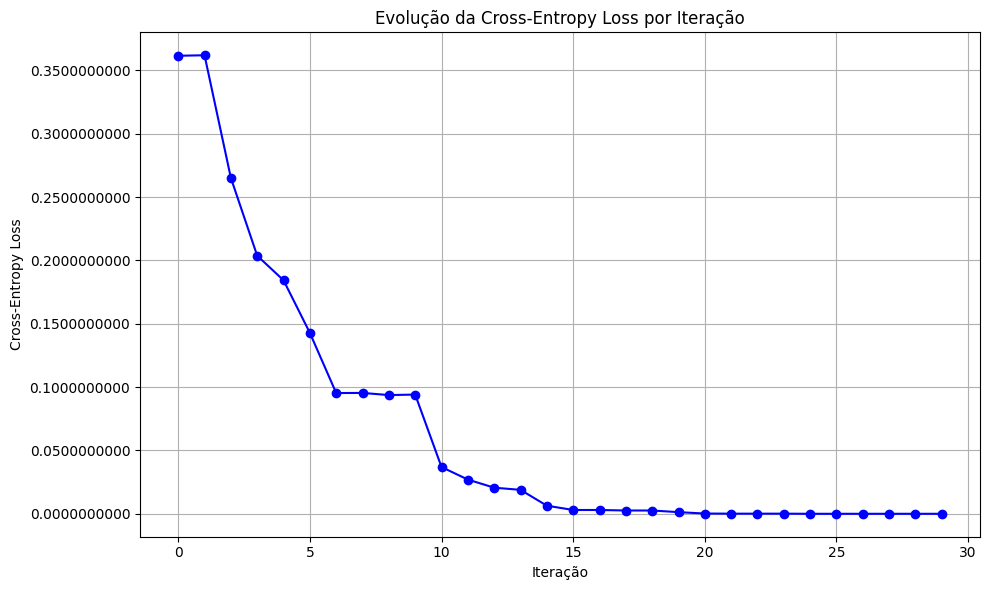

In [ ]:
# Ordena por iteração (garantir que está na ordem correta)
iteracoes = sorted(ENTROPY.keys())
losses = [ENTROPY[i] for i in iteracoes]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(iteracoes, losses, marker='o', linestyle='-', color='blue')
plt.title('Evolução da Cross-Entropy Loss por Iteração')
plt.xlabel('Iteração')
plt.ylabel('Cross-Entropy Loss')

# Define 6 casas decimais no eixo Y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.10f'))

plt.grid(True)
plt.tight_layout()
plt.show()


# Exercicio C - Naive Bayes and Spam


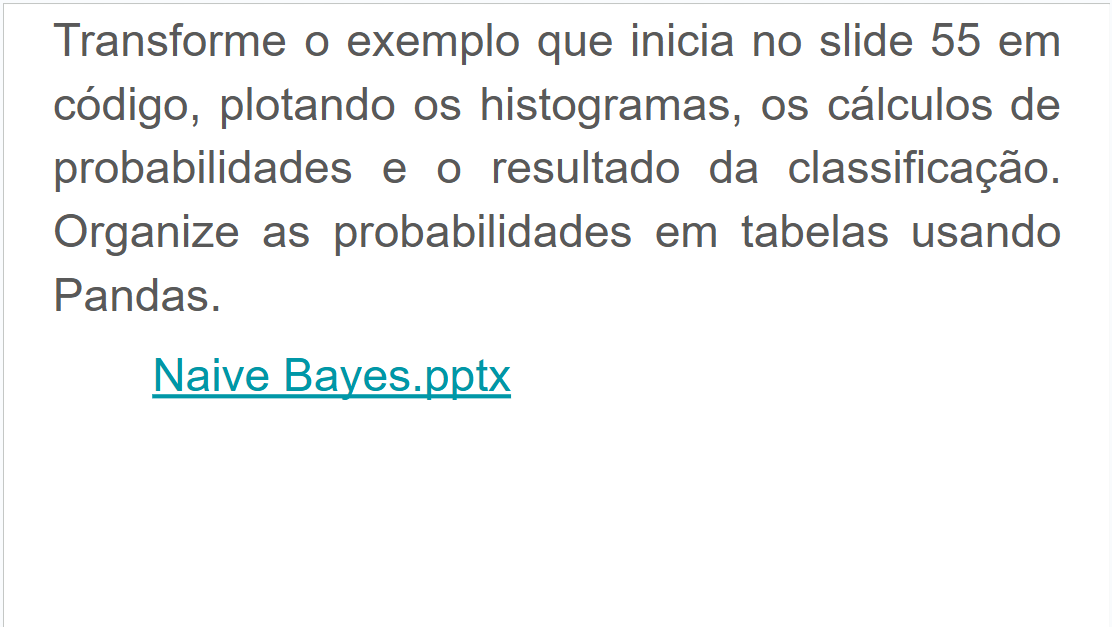

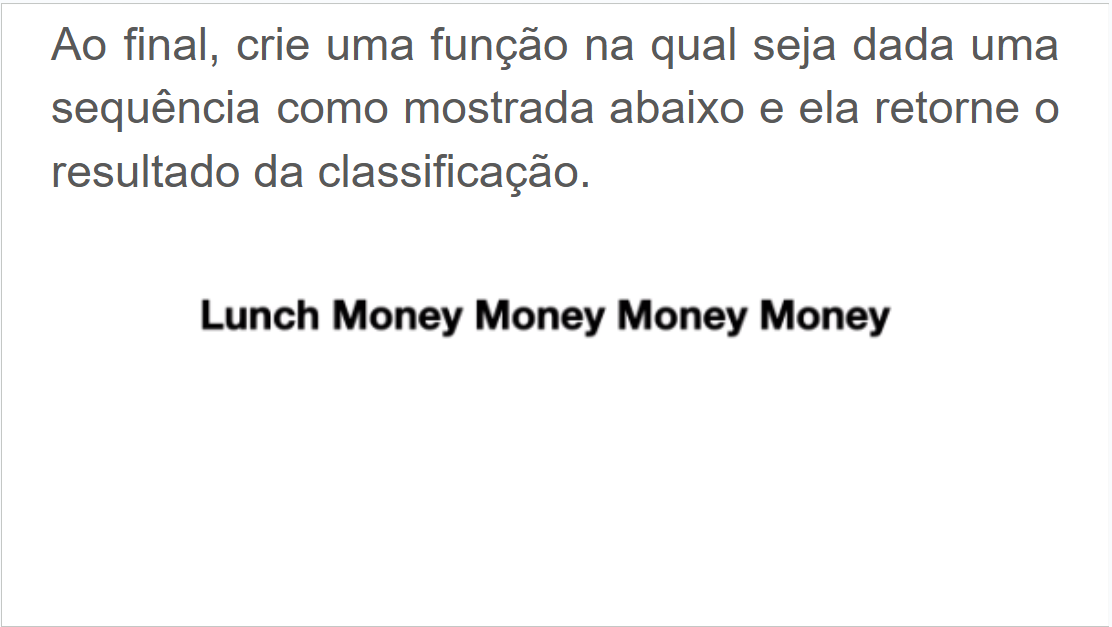

In [ ]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A3. A.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A3. B.png", width=950))
print("")  # Espaço entre as imagens

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Tabela com frequências das palavras nos e-mails
dados = {
    'Palavra': ['dear', 'friend', 'lunch', 'money'],
    'Não Spam': [9, 6, 4, 2],
    'Spam': [3, 2, 1, 5]
}
df = pd.DataFrame(dados)
df.set_index('Palavra', inplace=True)

# Totais por classe
total_nao_spam = df['Não Spam'].sum()
total_spam = df['Spam'].sum()

# Probabilidades condicionais (sem Laplace ainda)
df['P(palavra | Não Spam)'] = df['Não Spam'] / total_nao_spam
df['P(palavra | Spam)'] = df['Spam'] / total_spam

print(df)

# Probabilidades a priori
P_nao_spam = 8 / 12
P_spam = 4 / 12

#print(f"\nP(Não Spam) = {P_nao_spam:.4f}")
#print(f"P(Spam) = {P_spam:.4f}")

         Não Spam  Spam  P(palavra | Não Spam)  P(palavra | Spam)
Palavra                                                          
dear            9     3               0.428571           0.272727
friend          6     2               0.285714           0.181818
lunch           4     1               0.190476           0.090909
money           2     5               0.095238           0.454545


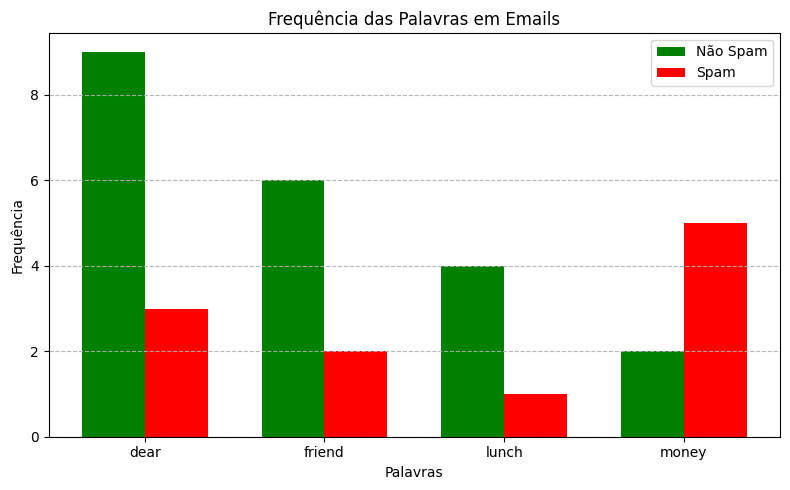

In [ ]:
# Cria DataFrame
df = pd.DataFrame(dados)

# Define posição das barras
import numpy as np
x = np.arange(len(df['Palavra']))  # posições das palavras no eixo X
largura = 0.35  # largura das barras

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - largura/2, df['Não Spam'], width=largura, label='Não Spam', color='green')
plt.bar(x + largura/2, df['Spam'], width=largura, label='Spam', color='red')

# Rótulos e legendas
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Frequência das Palavras em Emails')
plt.xticks(x, df['Palavra'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()


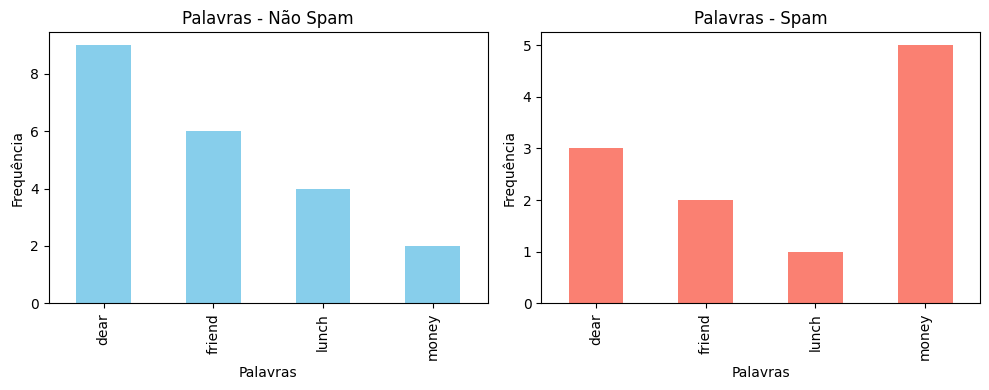

In [ ]:
df.set_index('Palavra', inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Não Spam'].plot(kind='bar', ax=axes[0], color='skyblue', title='Palavras - Não Spam')
df['Spam'].plot(kind='bar', ax=axes[1], color='salmon', title='Palavras - Spam')
for ax in axes:
    ax.set_ylabel('Frequência')
    ax.set_xlabel('Palavras')
plt.tight_layout()
plt.show()

In [ ]:
# Função de classificação
def classificar_email(email: str):
    palavras_email = email.lower().split()
    frequencias = Counter(palavras_email)

    #print(frequencias)

    prob_nao_spam = P_nao_spam
    prob_spam = P_spam

    for palavra, freq in frequencias.items():
        if palavra in df.index:
            prob_nao_spam *= df.loc[palavra, 'P(palavra | Não Spam)'] ** freq
            #print(f"Para a {palavra} a prob é {prob_nao_spam:.5f}")
            prob_spam *= df.loc[palavra, 'P(palavra | Spam)'] ** freq
            #print(f"Para a {palavra} a prob. SPAM é {prob_spam:.5f}")
        else:
            print(f"Aviso: Palavra desconhecida '{palavra}' será ignorada.")

    #total = prob_nao_spam + prob_spam
    #P_final_spam = prob_spam / total
    #P_final_nao_spam = prob_nao_spam / total

    if prob_spam > prob_nao_spam:
      classificação = "Spam"
    else:
      classificação = "Não tem Spam"

    return classificação

In [ ]:
# Exemplo de uso:
Texto = "dear friend lunch money"
resultado = classificar_email(Texto)
print(f"O email é {resultado}")

O email é Não Spam


In [ ]:
# Palavras e frequências nos emails classificados
dados = {
    'Palavra': ['dear', 'friend', 'lunch', 'money'],
    'Não Spam': [9, 6, 4, 2],   # 8 emails não spam
    'Spam': [3, 2, 1, 5]        # 4 emails spam
}

# Criar um DataFrame com os dados
df = pd.DataFrame(dados)

# Calcular totais por classe
total_nao_spam = df['Não Spam'].sum()  # Total de palavras em emails Não Spam
total_spam = df['Spam'].sum()          # Total de palavras em emails Spam

#round(melhor_loss, 6)

# Calcular as probabilidades condicionais
df['P(palavra | Não Spam)'] = round(df['Não Spam'] / total_nao_spam, 2)
df['P(palavra | Spam)'] = round(df['Spam'] / total_spam, 2)

# Mostrar o resultado
print(df)


  Palavra  Não Spam  Spam  P(palavra | Não Spam)  P(palavra | Spam)
0    dear         9     3                   0.43               0.27
1  friend         6     2                   0.29               0.18
2   lunch         4     1                   0.19               0.09
3   money         2     5                   0.10               0.45


In [ ]:
novo_email = ['lunch', 'money', 'money', 'money', 'money']

In [ ]:
# Probabilidades a priori
P_spam = 4 / 12
P_nao_spam = 8 / 12

# Inicializar as probabilidades com as a priori
prob_spam = round(P_spam, 2)
prob_nao_spam = round(P_nao_spam, 2)

# Multiplicar pelas probabilidades condicionais
for palavra in novo_email:
    prob_spam *= df.loc[df['Palavra'] == palavra, 'P(palavra | Spam)'].values[0]
    print(f"\nA {palavra}:")
    print(f"Spam: {prob_spam:.6f}")
    prob_nao_spam *= df.loc[df['Palavra'] == palavra, 'P(palavra | Não Spam)'].values[0]
    print(f"Não Spam: {prob_nao_spam:.6f}")


A lunch:
Spam: 0.029700
Não Spam: 0.127300

A money:
Spam: 0.013365
Não Spam: 0.012730

A money:
Spam: 0.006014
Não Spam: 0.001273

A money:
Spam: 0.002706
Não Spam: 0.000127

A money:
Spam: 0.001218
Não Spam: 0.000013


In [ ]:
# Normalizar (para somar 1)
total = prob_spam + prob_nao_spam
P_spam_final = prob_spam / total
P_nao_spam_final = prob_nao_spam / total


In [ ]:
resultado = pd.DataFrame({
    'Classe': ['Spam', 'Não Spam'],
    'Probabilidade Final': [P_spam_final, P_nao_spam_final]
})
print(resultado)


     Classe  Probabilidade Final
0      Spam             0.991989
1  Não Spam             0.008011


In [ ]:
import pandas as pd
from collections import Counter

# Passo 1: Criar a tabela com as frequências
dados = {
    'Palavra': ['dear', 'friend', 'lunch', 'money'],
    'Não Spam': [9, 6, 4, 2],
    'Spam': [3, 2, 1, 5]
}
df = pd.DataFrame(dados)
df.set_index('Palavra', inplace=True)

# Passo 2: Calcular totais por classe
total_nao_spam = df['Não Spam'].sum()
total_spam = df['Spam'].sum()

# Passo 3: Calcular P(palavra | classe)
df['P(palavra | Não Spam)'] = df['Não Spam'] / total_nao_spam
df['P(palavra | Spam)'] = df['Spam'] / total_spam

# Passo 4: Probabilidades a priori
P_nao_spam = 8 / 12
P_spam = 4 / 12

# 🟨 ENTRADA: novo e-mail como string
email = "money money lunch"

# Passo 5: Contar frequência das palavras no e-mail
palavras_email = email.lower().split()
frequencias = Counter(palavras_email)

# Passo 6: Calcular probabilidade total para cada classe
prob_nao_spam = P_nao_spam
prob_spam = P_spam

for palavra, freq in frequencias.items():
    if palavra in df.index:
        prob_nao_spam *= df.loc[palavra, 'P(palavra | Não Spam)'] ** freq
        prob_spam *= df.loc[palavra, 'P(palavra | Spam)'] ** freq
    else:
        print(f"(Palavra ignorada: '{palavra}' não vista no treino)")

# Passo 7: Normalizar
total = prob_nao_spam + prob_spam
P_final_spam = prob_spam / total
P_final_nao_spam = prob_nao_spam / total

# Passo 8: Exibir resultado
resultado = pd.DataFrame({
    'Classe': ['Spam', 'Não Spam'],
    'Probabilidade Final': [P_final_spam, P_final_nao_spam]
})

print("\nTabela de probabilidade por palavra:")
print(df[['Não Spam', 'Spam', 'P(palavra | Não Spam)', 'P(palavra | Spam)']])

print(f"\nEmail recebido: \"{email}\"\n")
print("Resultado da classificação:")
print(resultado.sort_values(by='Probabilidade Final', ascending=False))



Tabela de probabilidade por palavra:
         Não Spam  Spam  P(palavra | Não Spam)  P(palavra | Spam)
Palavra                                                          
dear            9     3               0.428571           0.272727
friend          6     2               0.285714           0.181818
lunch           4     1               0.190476           0.090909
money           2     5               0.095238           0.454545

Email recebido: "money money lunch"

Resultado da classificação:
     Classe  Probabilidade Final
0      Spam             0.844621
1  Não Spam             0.155379


# Exemplo D - Gauss Naive Bayes


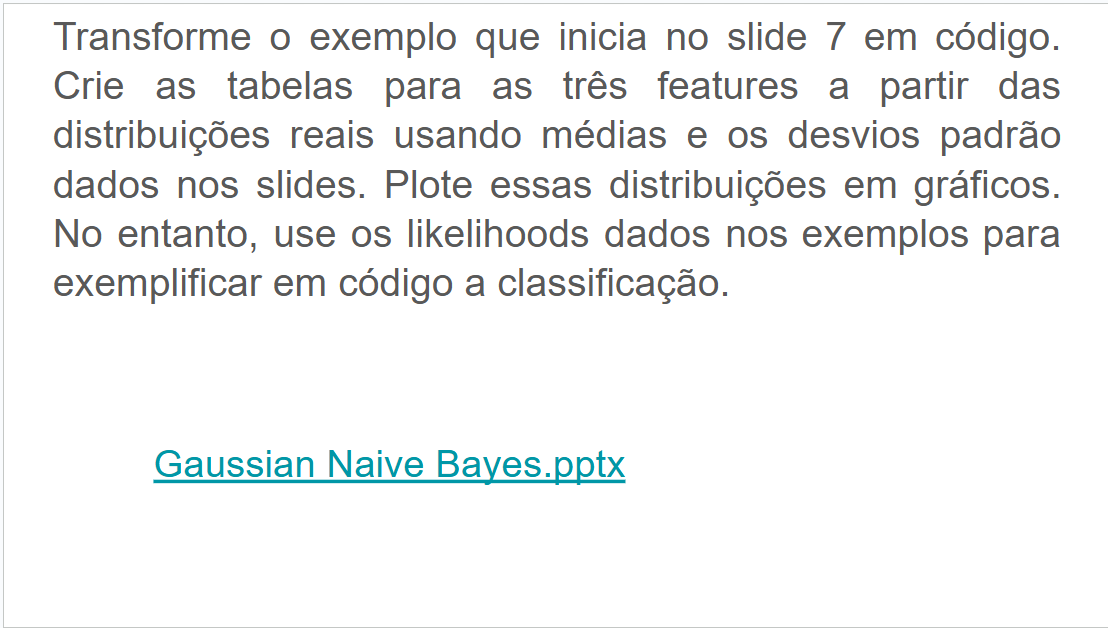

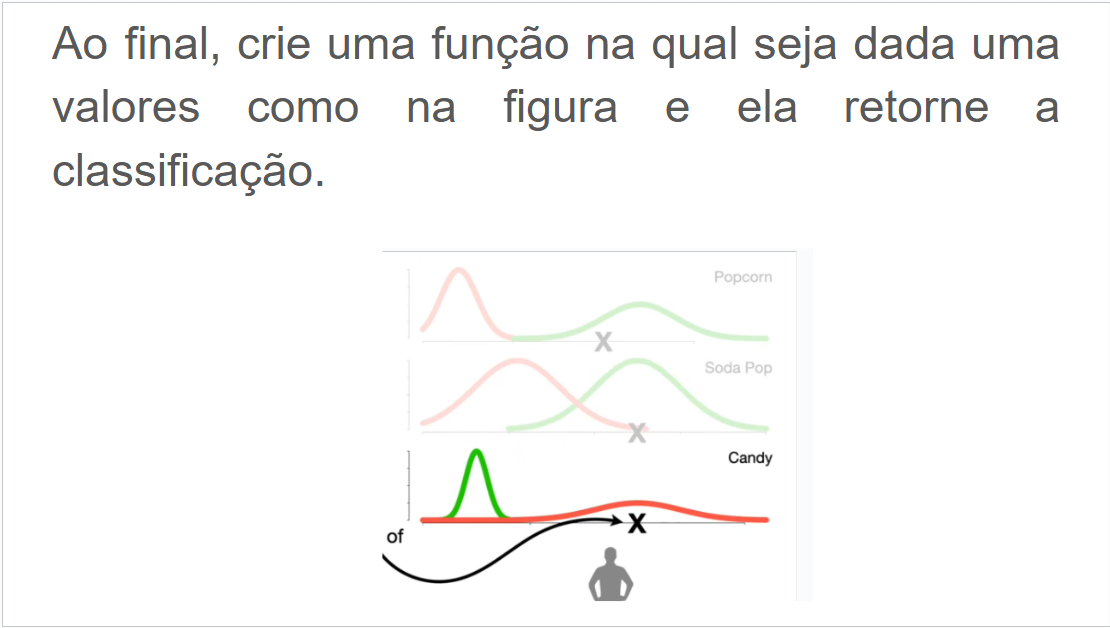

In [ ]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A4. A.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A4. B.png", width=950))
#print("")  # Espaço entre as imagens

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dados
Love_popcorn = [24.3, 28.2]
NoLove_popcorn = [2.1, 4.8]

Love_soda = [750.7 , 533.2]
NoLove_soda = [120.5 , 110.9]

Love_candy = [0.2 , 50.5]
NoLove_candy = [90.7 , 102.3]

value = [20, 500, 25]

print(value[0])
print(value[1])
print(value[2])

20
500
25


In [ ]:
# Cálculos estatísticos para popcorn
#media_Love_popcorn = np.mean(Love_popcorn)
#std_Love_popcorn = np.std(Love_popcorn, ddof=1)
media_Love_popcorn = 24
std_Love_popcorn = 4

#media_NoLove_popcorn = np.mean(NoLove_popcorn)
#std_NoLove_popcorn = np.std(NoLove_popcorn, ddof=1)
media_NoLove_popcorn = 4
std_NoLove_popcorn = 2


# Cálculos estatísticos para soda
media_Love_soda = np.mean(Love_soda)
std_Love_soda = np.std(Love_soda, ddof=1)
#media_Love = 24
#std_Love = 4

media_NoLove_soda = np.mean(NoLove_soda)
std_NoLove_soda = np.std(NoLove_soda, ddof=1)
#media_NoLove = 4
#std_NoLove = 2


# Cálculos estatísticos para candy
media_Love_candy = np.mean(Love_candy)
std_Love_candy = np.std(Love_candy, ddof=1)
#media_Love = 24
#std_Love = 4

media_NoLove_candy = np.mean(NoLove_candy)
std_NoLove_candy = np.std(NoLove_candy, ddof=1)
#media_NoLove = 4
#std_NoLove = 2

In [ ]:
# Gerar distribuições normais para Popcorn
x_love_popcorn = np.linspace(media_Love_popcorn - 4*std_Love_popcorn, media_Love_popcorn + 4*std_Love_popcorn, 100)
y_love_popcorn = norm.pdf(x_love_popcorn, media_Love_popcorn, std_Love_popcorn)

x_nolove_popcorn = np.linspace(media_NoLove_popcorn - 4*std_NoLove_popcorn, media_NoLove_popcorn + 4*std_NoLove_popcorn, 100)
y_nolove_popcorn = norm.pdf(x_nolove_popcorn, media_NoLove_popcorn, std_NoLove_popcorn)


# Gerar distribuições normais para Candy
x_love_candy = np.linspace(media_Love_candy - 4*std_Love_candy, media_Love_candy + 4*std_Love_candy, 100)
y_love_candy = norm.pdf(x_love_candy, media_Love_candy, std_Love_candy)

x_nolove_candy = np.linspace(media_NoLove_candy - 4*std_NoLove_candy, media_NoLove_candy + 4*std_NoLove_candy, 100)
y_nolove_candy = norm.pdf(x_nolove_candy, media_NoLove_candy, std_NoLove_candy)


# Gerar distribuições normais para Soda
x_love_soda = np.linspace(media_Love_soda - 4*std_Love_soda, media_Love_soda + 4*std_Love_soda, 100)
y_love_soda = norm.pdf(x_love_soda, media_Love_soda, std_Love_soda)

x_nolove_soda = np.linspace(media_NoLove_soda - 4*std_NoLove_soda, media_NoLove_soda + 4*std_NoLove_soda, 100)
y_nolove_soda = norm.pdf(x_nolove_soda, media_NoLove_soda, std_NoLove_soda)

In [ ]:
# Likeli popcorn
like_love_popcorn = norm.pdf(value[0], media_Love_popcorn, std_Love_popcorn)
like_nolove_popcorn = norm.pdf(value[0], media_NoLove_popcorn, std_NoLove_popcorn)
print(f"Likelihood LOVE POPCORN: {np.log(like_love_popcorn):.2f}")  # Saída: ≈0.5
print(f"Likelihood NO LOVE POPCORN: {np.log(like_nolove_popcorn):.2f}")  # Saída: ≈0.5


# Likeli Soda
like_love_soda = norm.pdf(value[1], media_Love_soda, std_Love_soda)
like_nolove_soda = norm.pdf(value[1], media_NoLove_soda, std_NoLove_soda)
#print(like_nolove_soda)
print(f"Likelihood LOVE SODA: {np.log(like_love_soda):.2f}")  # Saída: ≈0.5
print(f"Likelihood NO LOVE SODA: {np.log(like_nolove_soda):.6f}")  # Saída: ≈0.5


# Likeli Candy
like_love_candy = norm.pdf(value[2], media_Love_candy, std_Love_candy)
like_nolove_candy = norm.pdf(value[2], media_NoLove_candy, std_NoLove_candy)
print(f"Likelihood LOVE CANDY: {np.log(like_love_candy):.2f}")  # Saída: ≈0.5
print(f"Likelihood NO LOVE CANDY: {np.log(like_nolove_candy):.2f}")  # Saída: ≈0.5


Love_total = (like_love_popcorn) + (like_love_soda) + (like_love_candy)
NoLove_total = like_nolove_popcorn + like_nolove_soda + like_nolove_candy

print(Love_total)
print(NoLove_total)

if Love_total > NoLove_total:
    print("Classificação: LOVE")
else:
    print("Classificação: NO LOVE")

Likelihood LOVE POPCORN: -2.81
Likelihood NO LOVE POPCORN: -33.61
Likelihood LOVE SODA: -6.38
Likelihood NO LOVE SODA: -inf
Likelihood LOVE CANDY: -4.49
Likelihood NO LOVE CANDY: -41.02
0.0734028935772518
2.527674054530294e-15
Classificação: LOVE


<ipython-input-87-85d6d1fb5252>:13: RuntimeWarning: divide by zero encountered in log
  print(f"Likelihood NO LOVE SODA: {np.log(like_nolove_soda):.6f}")  # Saída: ≈0.5


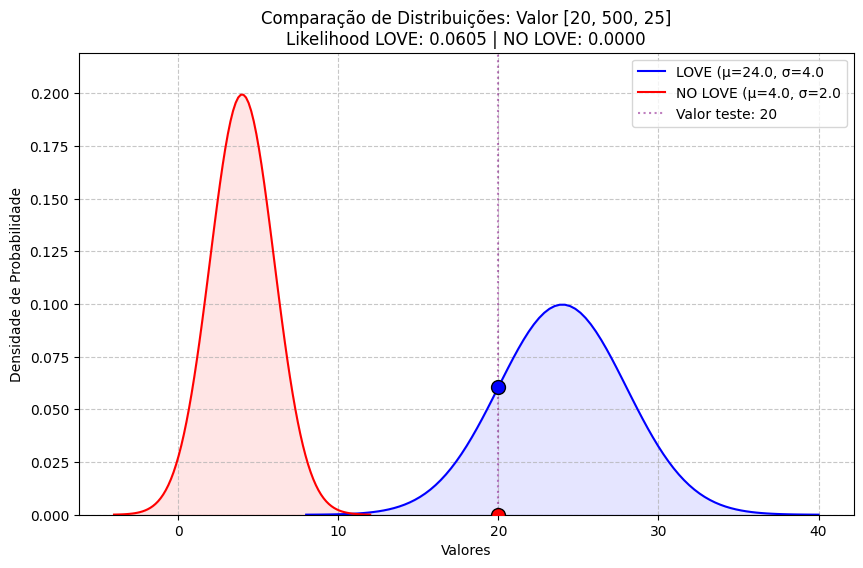

In [ ]:
# Plot para a POPCORN
plt.figure(figsize=(10, 6))

# Curva LOVE
plt.plot(x_love_popcorn, y_love_popcorn, 'b-', label=f'LOVE (μ={media_Love_popcorn:.1f}, σ={std_Love_popcorn:.1f}')
#plt.scatter(Love_popcorn, np.zeros_like(Love_popcorn), color='blue', label='Dados LOVE')
plt.fill_between(x_love_popcorn, y_love_popcorn, color='blue', alpha=0.1)

# Curva NO LOVE
plt.plot(x_nolove_popcorn, y_nolove_popcorn, 'r-', label=f'NO LOVE (μ={media_NoLove_popcorn:.1f}, σ={std_NoLove_popcorn:.1f}')
#plt.scatter(NoLove_popcorn, np.zeros_like(NoLove_popcorn), color='red', label='Dados NO LOVE')
plt.fill_between(x_nolove_popcorn, y_nolove_popcorn, color='red', alpha=0.1)


# ADIÇÃO: Plotar o ponto value=20
plt.axvline(value[0], color='purple', linestyle=':', alpha=0.5, label=f'Valor teste: {value[0]}')
plt.scatter(value[0], [like_love_popcorn], color='blue', s=100, edgecolor='black', zorder=5)
plt.scatter(value[0], [like_nolove_popcorn], color='red', s=100, edgecolor='black', zorder=5)

# Configurações do gráfico
plt.title(f"Comparação de Distribuições: Valor {value}\n"
          f"Likelihood LOVE: {like_love_popcorn:.4f} | NO LOVE: {like_nolove_popcorn:.4f}")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, max(max(y_love_popcorn), max(y_nolove_popcorn))*1.1)
plt.show()

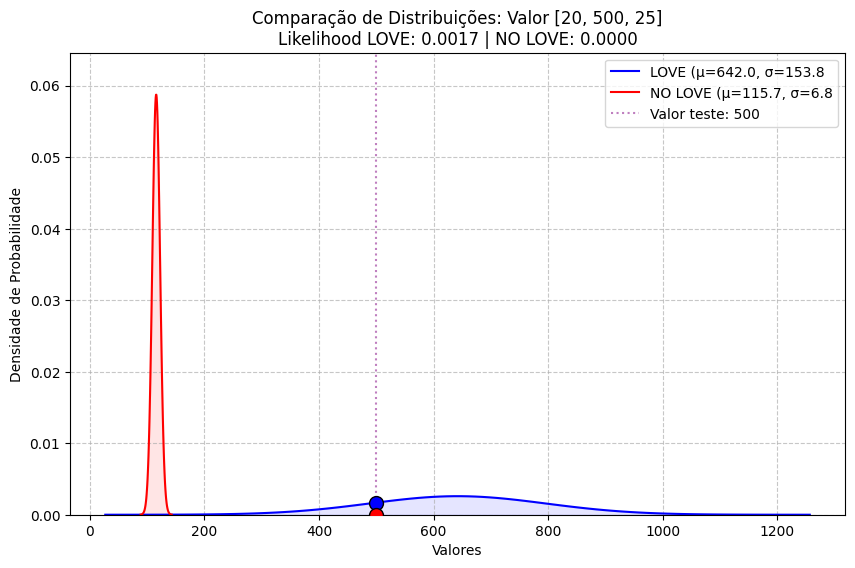

In [ ]:
# Plot para o SODA
plt.figure(figsize=(10, 6))

# Curva LOVE
plt.plot(x_love_soda, y_love_soda, 'b-', label=f'LOVE (μ={media_Love_soda:.1f}, σ={std_Love_soda:.1f}')
#plt.scatter(Love_soda, np.zeros_like(Love_soda), color='blue', label='Dados LOVE')
plt.fill_between(x_love_soda, y_love_soda, color='blue', alpha=0.1)

# Curva NO LOVE
plt.plot(x_nolove_soda, y_nolove_soda, 'r-', label=f'NO LOVE (μ={media_NoLove_soda:.1f}, σ={std_NoLove_soda:.1f}')
#plt.scatter(NoLove_soda, np.zeros_like(NoLove_soda), color='red', label='Dados NO LOVE')
plt.fill_between(x_nolove_soda, y_nolove_soda, color='red', alpha=0.1)

# ADIÇÃO: Plotar o ponto value=20
plt.axvline(value[1], color='purple', linestyle=':', alpha=0.5, label=f'Valor teste: {value[1]}')
plt.scatter(value[1], [like_love_soda], color='blue', s=100, edgecolor='black', zorder=5)
plt.scatter(value[1], [like_nolove_soda], color='red', s=100, edgecolor='black', zorder=5)

# Configurações do gráfico
plt.title(f"Comparação de Distribuições: Valor {value}\n"
          f"Likelihood LOVE: {like_love_soda:.4f} | NO LOVE: {like_nolove_soda:.4f}")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, max(max(y_love_soda), max(y_nolove_soda))*1.1)
plt.show()

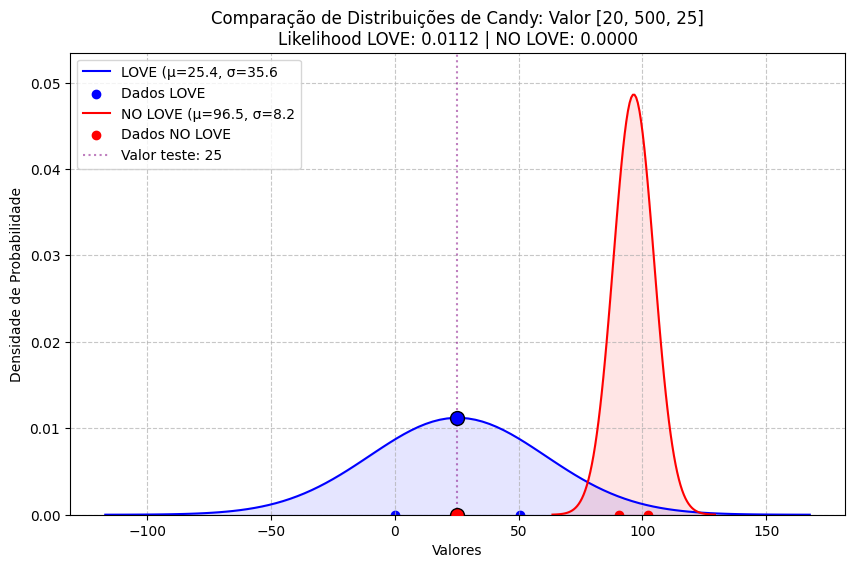

In [ ]:
# Plot para o CANDY
plt.figure(figsize=(10, 6))

# Curva LOVE
plt.plot(x_love_candy, y_love_candy, 'b-', label=f'LOVE (μ={media_Love_candy:.1f}, σ={std_Love_candy:.1f}')
plt.scatter(Love_candy, np.zeros_like(Love_candy), color='blue', label='Dados LOVE')
plt.fill_between(x_love_candy, y_love_candy, color='blue', alpha=0.1)

# Curva NO LOVE
plt.plot(x_nolove_candy, y_nolove_candy, 'r-', label=f'NO LOVE (μ={media_NoLove_candy:.1f}, σ={std_NoLove_candy:.1f}')
plt.scatter(NoLove_candy, np.zeros_like(NoLove_candy), color='red', label='Dados NO LOVE')
plt.fill_between(x_nolove_candy, y_nolove_candy, color='red', alpha=0.1)

# ADIÇÃO: Plotar o ponto value=20
plt.axvline(value[2], color='purple', linestyle=':', alpha=0.5, label=f'Valor teste: {value[2]}')
plt.scatter(value[2], [like_love_candy], color='blue', s=100, edgecolor='black', zorder=5)
plt.scatter(value[2], [like_nolove_candy], color='red', s=100, edgecolor='black', zorder=5)

# Configurações do gráfico
plt.title(f"Comparação de Distribuições de Candy: Valor {value}\n"
          f"Likelihood LOVE: {like_love_candy:.4f} | NO LOVE: {like_nolove_candy:.4f}")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, max(max(y_love_candy), max(y_nolove_candy))*1.1)
plt.show()

# EXERCICIO E - Naive Bayes and Iris dataset/Acurácia

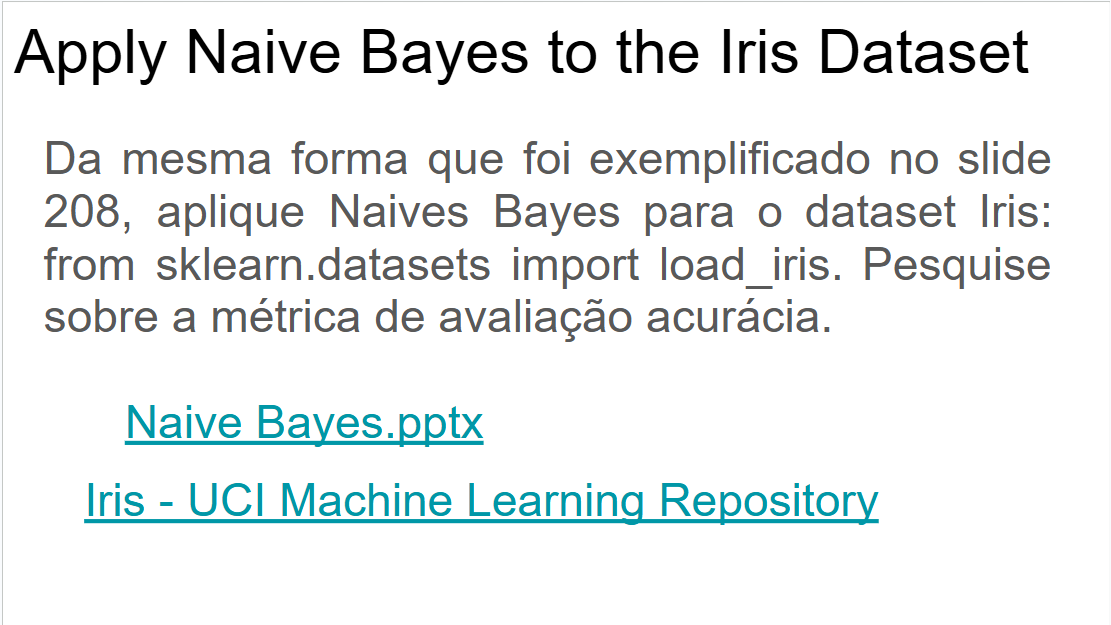

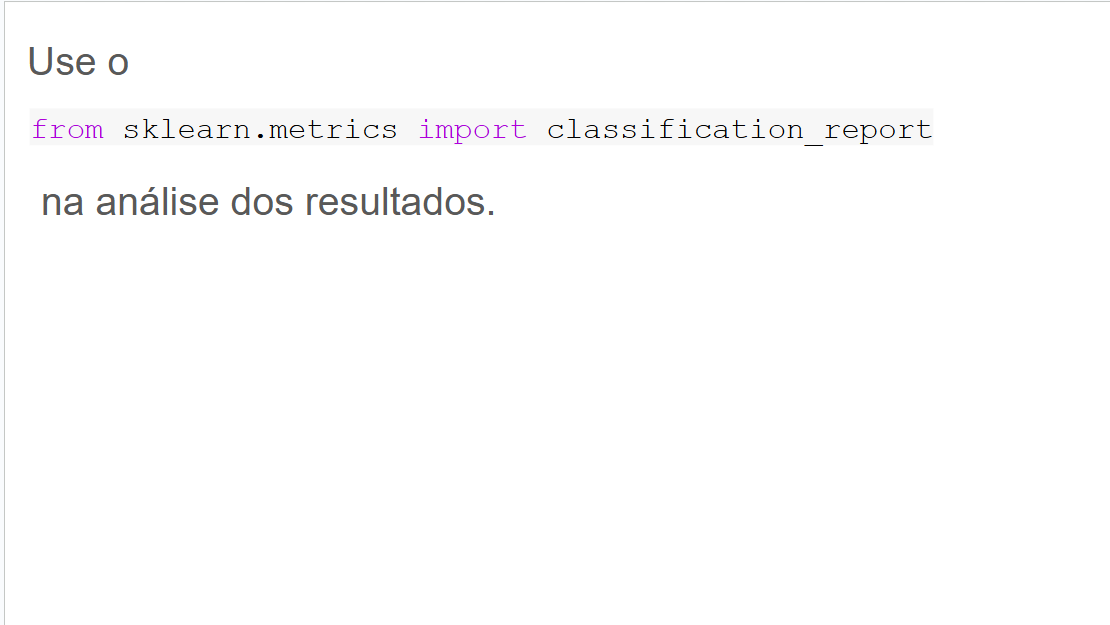

In [ ]:
from IPython.display import Image, display

# Exibe a primeira imagem com largura ajustada
display(Image("/content/Imagens/A5. A.png", width=950))
print("")  # Espaço entre as imagens

# Exibe a segunda imagem com largura ajustada
display(Image("/content/Imagens/A5. B.png", width=950))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
# 1. Carrega o dataset Iris
iris = load_iris()

# 2. Dados (features) e rótulos (labels)
X = iris.data             # Matrizes com as características (flores)
y = iris.target           # Vetor com os rótulos (0, 1 ou 2 = tipos de flor)

# 3. (Opcional) Visualizar com pandas
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Treinar modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = model.predict(X_test)

# 7. Avaliar acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", round(accuracy, 4))

# (Opcional) Mostrar previsões
print("Previsões:", y_pred)
print("Reais:", y_test)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Acurácia do modelo: 0.9778
Previsões: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Reais: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Carrega o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treina o modelo
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Faz previsões
y_pred = model.predict(X_test)

# 5. Avaliação com métricas
print("Acurácia:", round(accuracy_score(y_test, y_pred), 4))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Acurácia: 0.9778

Relatório de Classificação:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# EXERCICIO F - Simule os slides

In [ ]:
def valor_esperado(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu):
    """
    Calcula o valor esperado com base nas probabilidades e outcomes.

    Args:
        total (int): Total de pessoas.
        ja_viram (int): Pessoas que já viram.
        nunca_viram (int): Pessoas que nunca viram.
        outcome_ja_viu (float): Valor ganho/perdido se a pessoa já viu.
        outcome_nunca_viu (float): Valor ganho/perdido se a pessoa nunca viu.

    Returns:
        float: Valor esperado.
    """
    prob_ja_viu = ja_viram / total
    prob_nunca_viu = nunca_viram / total
    print(f"Probabilidade de já ver: {prob_ja_viu:.3f}")
    print(f"Probabilidade de nunca ver: {prob_nunca_viu:.3f}")
    valor_esperado = (prob_ja_viu * outcome_ja_viu) + (prob_nunca_viu * outcome_nunca_viu)
    return valor_esperado

In [ ]:
# Dados do problema
total = 213
ja_viram = 37
nunca_viram = 176
outcome_ja_viu = 1  # Perde 1 real
outcome_ja_viu = outcome_ja_viu*-1
outcome_nunca_viu = 1  # Ganha 1 real

# Calcular e imprimir o valor esperado
ev = valor_esperado(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu)
print(f"Valor Esperado: {ev:.3f} reais por pergunta")

Probabilidade de já ver: 0.174
Probabilidade de nunca ver: 0.826
Valor Esperado: 0.653 reais por pergunta


In [ ]:
from fractions import Fraction

def valor_esperado_exato(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu):
    prob_ja_viu = Fraction(ja_viram, total)
    prob_nunca_viu = Fraction(nunca_viram, total)
    ev = float(prob_ja_viu * outcome_ja_viu + prob_nunca_viu * outcome_nunca_viu)
    return round(ev, 2)

# Dados do problema
total = 213
ja_viram = 37
nunca_viram = 176
outcome_ja_viu = -1  # Perde 1 real
outcome_nunca_viu = 1  # Ganha 1 real

ev_exato = valor_esperado_exato(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu)
print(f"Valor Esperado (Exato): {ev_exato:.2f} reais por pergunta")

Valor Esperado (Exato): 0.65 reais por pergunta


In [ ]:
import random
from fractions import Fraction

# Função para calcular o valor esperado teórico
def valor_esperado_teorico(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu):
    prob_ja_viu = Fraction(ja_viram, total)
    prob_nunca_viu = Fraction(nunca_viram, total)
    ev = float(prob_ja_viu * outcome_ja_viu + prob_nunca_viu * outcome_nunca_viu)
    return round(ev, 2)

# Função para simular o experimento
def simular_experimento(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu, repeticoes):
    resultados = []
    for _ in range(repeticoes):
        # Simula uma resposta aleatória baseada nas probabilidades
        if random.random() < ja_viram / total:
            resultados.append(outcome_ja_viu)
        else:
            resultados.append(outcome_nunca_viu)
    valor_medio = sum(resultados) / repeticoes
    return round(valor_medio, 2)

# Dados do problema
total = 213
ja_viram = 37
nunca_viram = 176
outcome_ja_viu = -1  # Perde 1 real
outcome_nunca_viu = 1  # Ganha 1 real

# Valor teórico
ev_teorico = valor_esperado_teorico(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu)

# Simulações para diferentes números de repetições
repeticoes = [10, 100, 1000, 10000]
print(f"Valor Esperado Teórico: {ev_teorico:.2f} reais por pergunta\n")

for n in repeticoes:
    ev_simulado = simular_experimento(total, ja_viram, nunca_viram, outcome_ja_viu, outcome_nunca_viu, n)
    diferenca = abs(ev_teorico - ev_simulado)
    print(f"Repetições: {n}")
    print(f"Valor Simulado: {ev_simulado:.2f} reais")
    print(f"Diferença para o Teórico: {diferenca:.2f}")
    print("---")

Valor Esperado Teórico: 0.65 reais por pergunta

Repetições: 10
Valor Simulado: 1.00 reais
Diferença para o Teórico: 0.35
---
Repetições: 100
Valor Simulado: 0.78 reais
Diferença para o Teórico: 0.13
---
Repetições: 1000
Valor Simulado: 0.64 reais
Diferença para o Teórico: 0.01
---
Repetições: 10000
Valor Simulado: 0.66 reais
Diferença para o Teórico: 0.01
---


# RASCUNHO

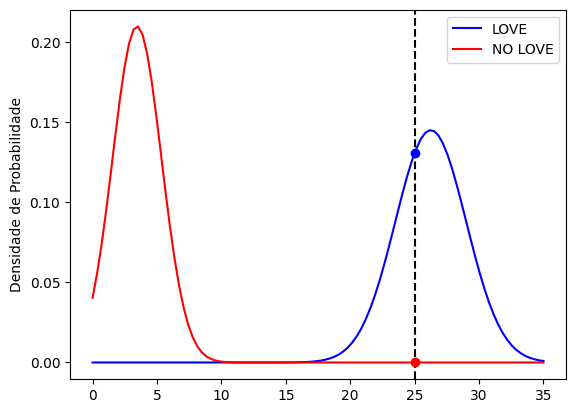

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

value = 25
x = np.linspace(0, 35, 100)

plt.plot(x, norm.pdf(x, 26.25, 2.75), 'b-', label='LOVE')
plt.plot(x, norm.pdf(x, 3.45, 1.90), 'r-', label='NO LOVE')
plt.axvline(value, color='k', linestyle='--')
plt.plot(value, norm.pdf(value, 26.25, 2.75), 'bo')
plt.plot(value, norm.pdf(value, 3.45, 1.90), 'ro')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

In [ ]:
import random

def entropia(prob, base=2):
    prob = np.array(prob)
    prob = prob[prob > 0]
    log_func = np.log2 if base == 2 else np.log
    return -np.sum(prob * log_func(prob))

def simular_moeda_justa(qtd_amostras, tamanho_amostra=10):
    lista_entropias = []
    for i in range(qtd_amostras):
        resultados = [random.choice(['cara', 'coroa']) for _ in range(tamanho_amostra)]
        caras = resultados.count('cara') / tamanho_amostra
        coroas = resultados.count('coroa') / tamanho_amostra
        h = entropia([caras, coroas])
        #print(f"Amostra {i+1}: Cara={caras:.2f}, Coroa={coroas:.2f}")
        #print(f"Entropia: {h:.3f} bits\n")
        lista_entropias.append(h)
    return lista_entropias

def simular_moeda_viciada(qtd_amostras):
  for i in range(qtd_amostras):
    resultados = [random.choices(['cara', 'coroa'], weights=[0.9, 0.1])[0] for _ in range(10)]
    caras = resultados.count('cara') / 10
    coroas = resultados.count('coroa') / 10
    print(f"Amostra {i+1}: Cara={caras:.2f}, Coroa={coroas:.2f}")
    #return caras, coroas

def simular_moeda_empate(qtd_amostras):
  print(f"\n🔹 Simulando {qtd_amostras} amostras com 10 lançamentos cada:")
  for i in range(qtd_amostras):
    resultados = [random.choices(['cara', 'Empate', 'coroa'], weights=[0.49, 0.02, 0.49])[0] for _ in range(10)]
    caras = resultados.count('cara') / 10
    coroas = resultados.count('coroa') / 10
    empates = resultados.count('Empate') / 10
    print(f"Amostra {i+1}: Cara={caras:.2f}, Coroa={coroas:.2f}, Empate={empates:.2f}")
    #return caras, coroas, empates


In [ ]:
from math import log2

def entropia(probabilidades, base=2):
    """Calcula a entropia de uma distribuição de probabilidades"""
    log = lambda x: log2(x) if base == 2 else log(x)
    return -sum(p * log(p) for p in probabilidades if p > 0)

# Exemplo de uso
print(f"Moeda justa: {entropia([0.5, 0.5]):.3f} bits")
print(f"Moeda viciada: {entropia([0.49, 0.49,  0.02]):.3f} bits")
print(f"Evento certo: {entropia([0.9, 0.1]):.3f} bits")

Moeda justa: 1.000 bits
Moeda viciada: 1.121 bits
Evento certo: 0.469 bits
